<a href="https://colab.research.google.com/github/Kila1515/ML/blob/main/money2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Name    : Machine Learning
 
 File Name       : Trial.ipynb
 
 Creation Date   : Jun 9 2021
 
 Copyright (c) 2021 KAMAKE no SUSUME. All rights reserved.
 
 This source code or any portion thereof must not be reproduced or used in any manner whatsoever.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


コメント追加

In [2]:
!ls

drive  sample_data


In [3]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [ ]:
%run prepare_images.py datasets/mydata

Copied images from datasets/mydata/1yenA
Copied images from datasets/mydata/1yenB
Copied images from datasets/mydata/5yenA
Copied images from datasets/mydata/5yenB
Copied images from datasets/mydata/10yenA
Copied images from datasets/mydata/10yenB
Copied images from datasets/mydata/50yenA
Copied images from datasets/mydata/50yenB
Copied images from datasets/mydata/100yenA
Copied images from datasets/mydata/100yenB


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.9.2
class number=10
['100yenA', '100yenB', '10yenA', '10yenB', '1yenA', '1yenB', '50yenA', '50yenB', '5yenA', '5yenB']


Found 415 images belonging to 10 classes.
Found 20 images belonging to 10 classes.
## Train Data Sample ##


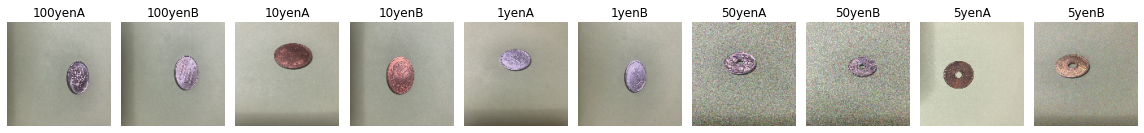

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 activation (Activation)     (None, 128, 128, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 8)       584       
                                                                 
 activation_1 (Activation)   (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 31752)             0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/48
35/35 [==============================] - 144s 4s/step - loss: 2.8302 - accuracy: 0.0940 - val_loss: 2.3010 - val_accuracy: 0.1000
Epoch 2/48
35/35 [==============================] - 11s 300ms/step - loss: 2.2950 - accuracy: 0.1373 - val_loss: 2.2973 - val_accuracy: 0.3000
Epoch 3/48
35/35 [==============================] - 11s 300ms/step - loss: 2.2777 - accuracy: 0.1373 - val_loss: 2.2419 - val_accuracy: 0.3500
Epoch 4/48
35/35 [==============================] - 10s 298ms/step - loss: 2.2176 - accuracy: 0.2120 - val_loss: 2.1085 - val_accuracy: 0.5000
Epoch 5/48
35/35 [==============================] - 10s 299ms/step - loss: 1.8151 - accuracy: 0.4145 - val_loss: 1.3804 - val_accuracy: 0.5000
Epoch 6/48
35/35 [==============================] - 11s 303ms/step - loss: 1.1129 - accuracy: 0.6530 - val_loss: 0.8277 - val_accuracy: 0.8500
Epoch 7/48
35/35 [==============================] - 11s 302ms/step - loss: 0.6071 - accuracy: 0.8241 - val_loss: 0.6985 - val_accuracy: 0.8000
E

In [5]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 48
# バッチサイズ
BATCH_SIZE = 12

IMAGE_SIZE = 128

train_data_gen = ImageDataGenerator(rescale=1./255)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180)
val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 1s 176ms/step
Prediction data
[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.148 0.    0.001 0.002 0.199 0.047 0.286 0.313 0.006 0.   ]
 [0.    0.999 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.015 0.124 0.001 0.285 0.055 0.125 0.316 0.069 0.011 0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.004 0.009 0.228 0.001 0.33  0.    0.203 0.221

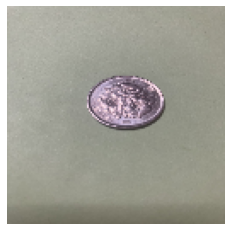

#2 Expected:100yenB -> Predicted:100yenB
File: 100yenB/S__111009816.jpg
Each Prediction Value: [0.    0.999 0.    0.    0.    0.    0.    0.    0.    0.   ]
* Correct *
#3 Expected:100yenB -> Predicted:100yenB
File: 100yenB/S__111108152.jpg
Each Prediction Value: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
* Correct *
#4 Expected:10yenA -> Predicted:10yenA
File: 10yenA/S__111108115.jpg
Each Prediction Value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
* Correct *
#5 Expected:10yenA -> Predicted:10yenA
File: 10yenA/S__111108116.jpg
Each Prediction Value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
* Correct *
#6 Expected:10yenB -> Predicted:10yenA
File: 10yenB/S__111108140.jpg
Each Prediction Value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
**** INCORRECT ****


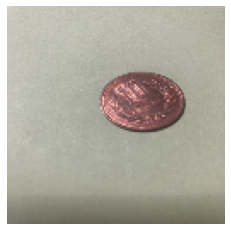

#7 Expected:10yenB -> Predicted:10yenB
File: 10yenB/S__111108141.jpg
Each Prediction Value: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
* Correct *
#8 Expected:1yenA -> Predicted:1yenA
File: 1yenA/S__111009796.jpg
Each Prediction Value: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
* Correct *
#9 Expected:1yenA -> Predicted:1yenA
File: 1yenA/S__111108104.jpg
Each Prediction Value: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
* Correct *
#10 Expected:1yenB -> Predicted:1yenB
File: 1yenB/S__111009798.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
* Correct *
#11 Expected:1yenB -> Predicted:50yenA
File: 1yenB/S__111108131.jpg
Each Prediction Value: [0.015 0.124 0.001 0.285 0.055 0.125 0.316 0.069 0.011 0.   ]
**** INCORRECT ****


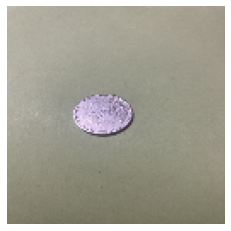

#12 Expected:50yenA -> Predicted:50yenA
File: 50yenA/S__111108118.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
* Correct *
#13 Expected:50yenA -> Predicted:50yenA
File: 50yenA/S__111108122.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
* Correct *
#14 Expected:50yenB -> Predicted:1yenA
File: 50yenB/S__111108148.jpg
Each Prediction Value: [0.004 0.009 0.228 0.001 0.33  0.    0.203 0.221 0.001 0.003]
**** INCORRECT ****


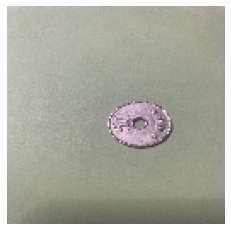

#15 Expected:50yenB -> Predicted:50yenB
File: 50yenB/S__111108150.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
* Correct *
#16 Expected:5yenA -> Predicted:5yenA
File: 5yenA/S__111009802.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
* Correct *
#17 Expected:5yenA -> Predicted:5yenB
File: 5yenA/S__111108109.jpg
Each Prediction Value: [0.004 0.    0.003 0.    0.    0.    0.    0.006 0.025 0.962]
**** INCORRECT ****


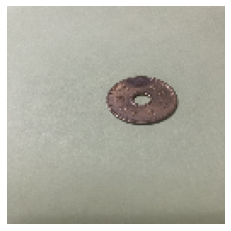

#18 Expected:5yenB -> Predicted:5yenB
File: 5yenB/S__111009803.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
* Correct *
#19 Expected:5yenB -> Predicted:5yenB
File: 5yenB/S__111108138.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
* Correct *
Loss


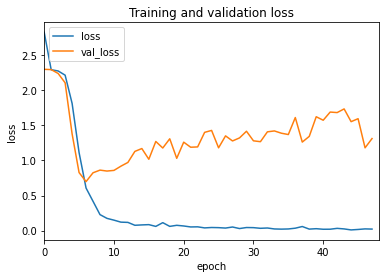

Accuracy


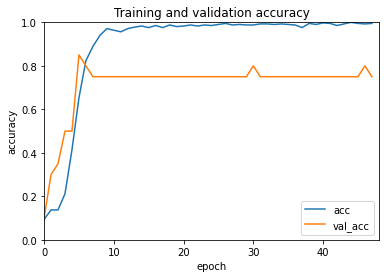

20/20 [==============================] - 1s 24ms/step
Confusion Matrix


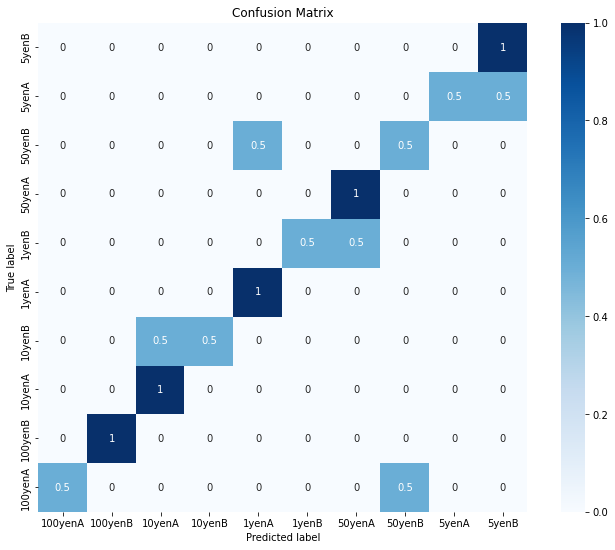

In [6]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

Visualize filter: conv2d


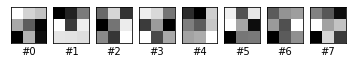

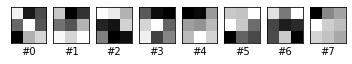

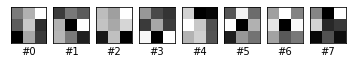

Visualize filter: conv2d_1


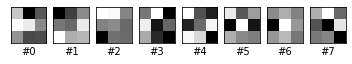

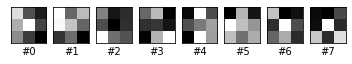

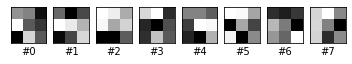

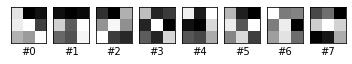

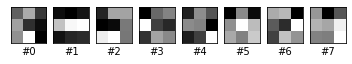

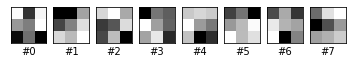

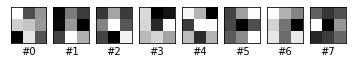

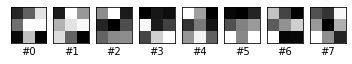

In [8]:
visualize.vis_filter(model, 'conv2d')
visualize.vis_filter(model, 'conv2d_1')

In [9]:
!cat incorrect.txt

target_datasets/val/100yenA/S__111108128.jpg
target_datasets/val/10yenB/S__111108140.jpg
target_datasets/val/1yenB/S__111108131.jpg
target_datasets/val/50yenB/S__111108148.jpg
target_datasets/val/5yenA/S__111108109.jpg


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 activation (Activation)     (None, 128, 128, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 8)       584       
                                                                 
 activation_1 (Activation)   (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 31752)             0         
                                                        

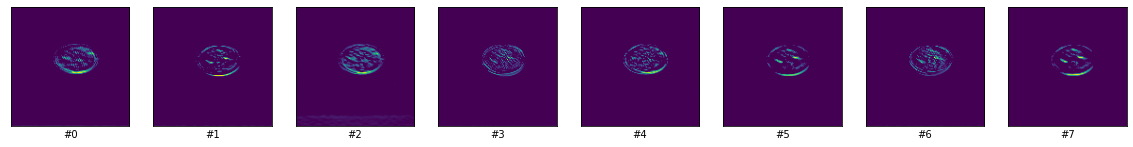

1/1 [==============================] - 0s 17ms/step
target_datasets/val/10yenB/S__111108140.jpg


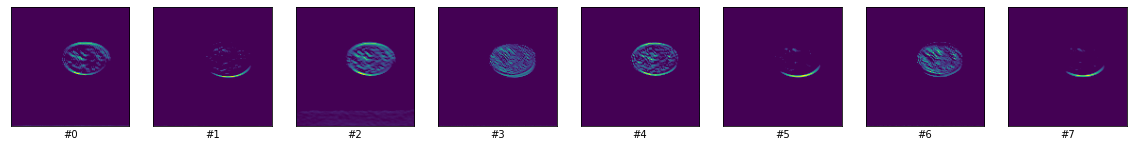

1/1 [==============================] - 0s 14ms/step
target_datasets/val/1yenB/S__111108131.jpg


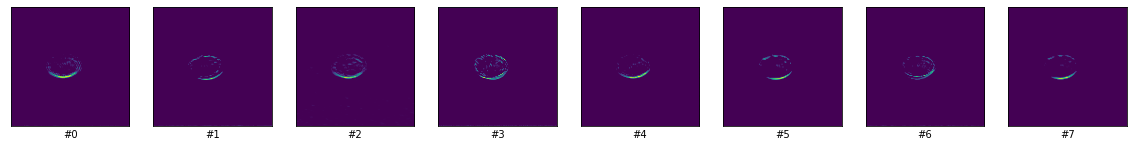

1/1 [==============================] - 0s 14ms/step
target_datasets/val/50yenB/S__111108148.jpg


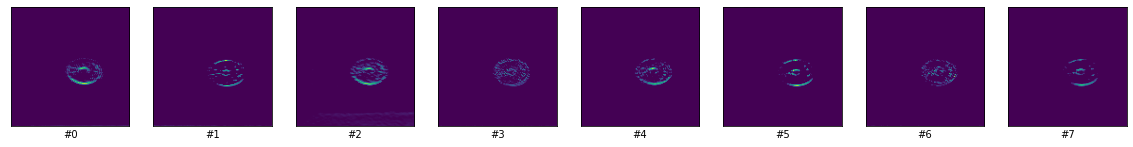

1/1 [==============================] - 0s 14ms/step
target_datasets/val/5yenA/S__111108109.jpg


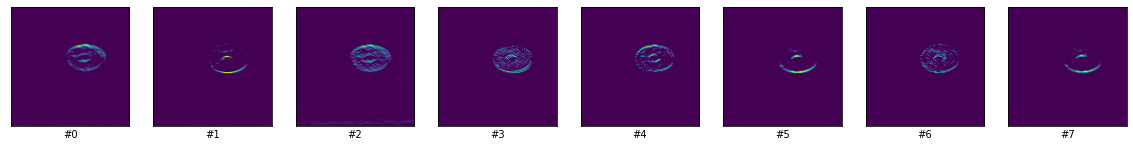

In [11]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_1', IMAGE_SIZE)